In [1]:
import sys
sys.path.append('../scripts/')
from dynamic_programming import *

In [2]:
import seaborn as sns   ###dp2exec

puddles = [] 
dp = DynamicProgramming(np.array([0.2, 0.2, math.pi/18]).T, Goal(-1.5,-1.5), puddles, 0.1, 10) 
counter = 0 #スイープの回数

In [3]:
delta = 1e100

while delta > 0.01: 
    delta = dp.value_iteration_sweep()
    counter += 1
    print(counter, delta)

1 48.74624281719452
2 47.00297571111073
3 24.6132676764937
4 22.05494062890969
5 18.4178252884619
6 16.48940466843038
7 15.217395592770231
8 14.259929915669304
9 13.470653193546255
10 12.700886270284016
11 12.124108847528461
12 11.627652476564421
13 11.177079167089168
14 10.755127374235336
15 10.39499132208934
16 10.13371929510626
17 9.79754184643
18 9.562090239125318
19 9.258294922647842
20 9.111436289759098
21 8.82543964108688
22 8.69301350572313
23 8.450163278255218
24 8.34635472921542
25 8.10128096859659
26 7.908495317512418
27 7.7850303686741285
28 7.669759844393802
29 7.514011364287732
30 7.368167757494405
31 7.230750975065838
32 7.121851536737815
33 6.999793975581667
34 6.902828372572337
35 6.799451101116738
36 6.604928099340746
37 6.240183220140182
38 5.7465967724321985
39 5.596207492381282
40 5.417520027852632
41 5.1458408860931115
42 4.802173399053288
43 4.408411501970704
44 3.985519139142294
45 3.552190014734652
46 3.1240368267815803
47 2.713253899740778
48 2.486073887396362

In [7]:
with open("policy_for_pfc.txt", "w") as f:  ###dp2writepolicy
    for index in dp.indexes:
        p = dp.policy[index]
        f.write("{} {} {} {} {}\n".format(index[0], index[1], index[2], p[0], p[1]))
        
with open("value_for_pfc.txt", "w") as f:
    for index in dp.indexes:
        p = dp.value_function[index]
        f.write("{} {} {} {}\n".format(index[0], index[1], index[2], p))

<IPython.core.display.Javascript object>


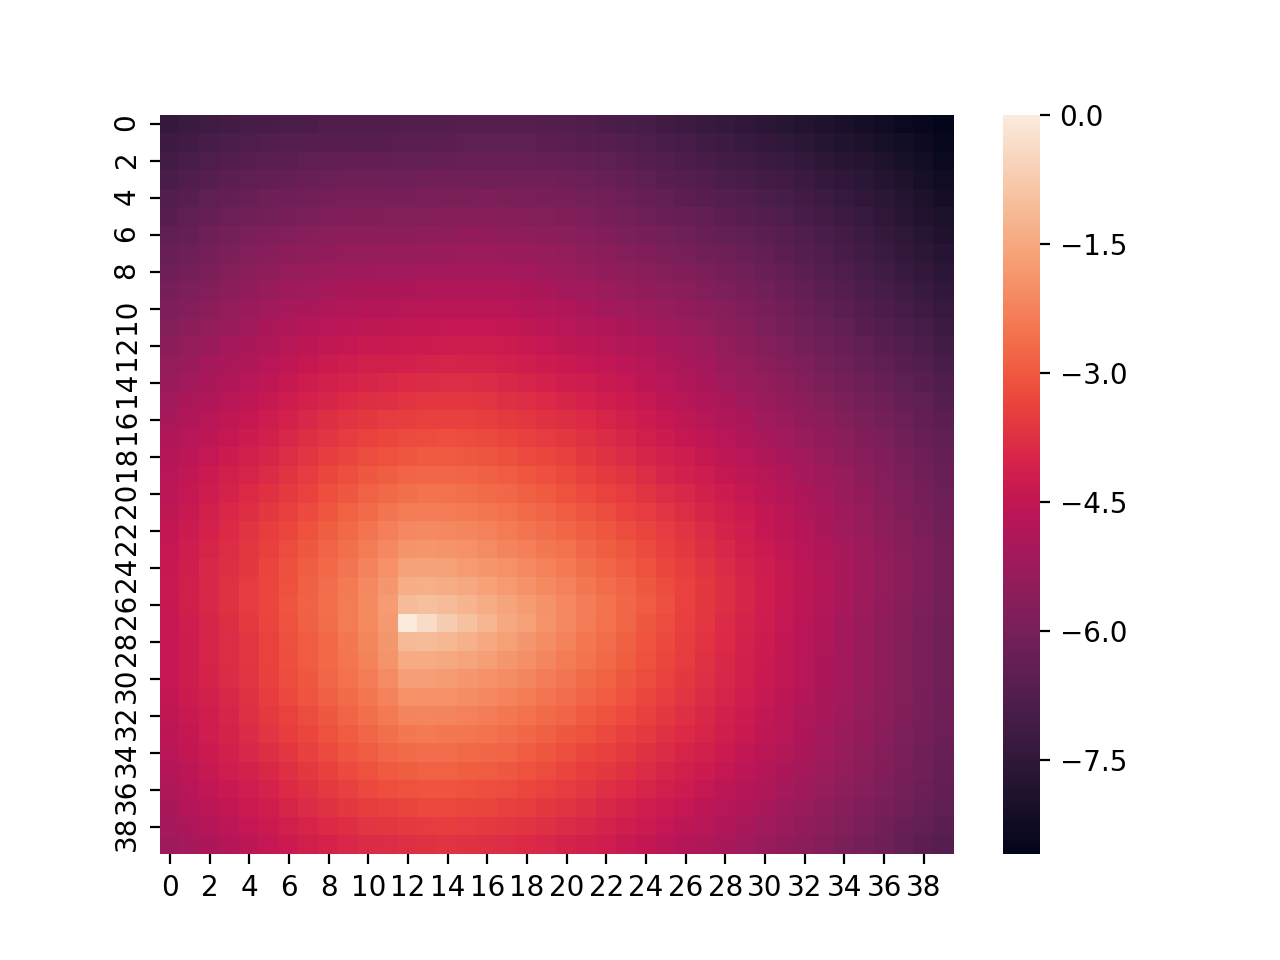

In [8]:
v = dp.value_function[:, :, 18]  ###dp1valuedraw
sns.heatmap(np.rot90(v), square=False)
plt.show()

<IPython.core.display.Javascript object>


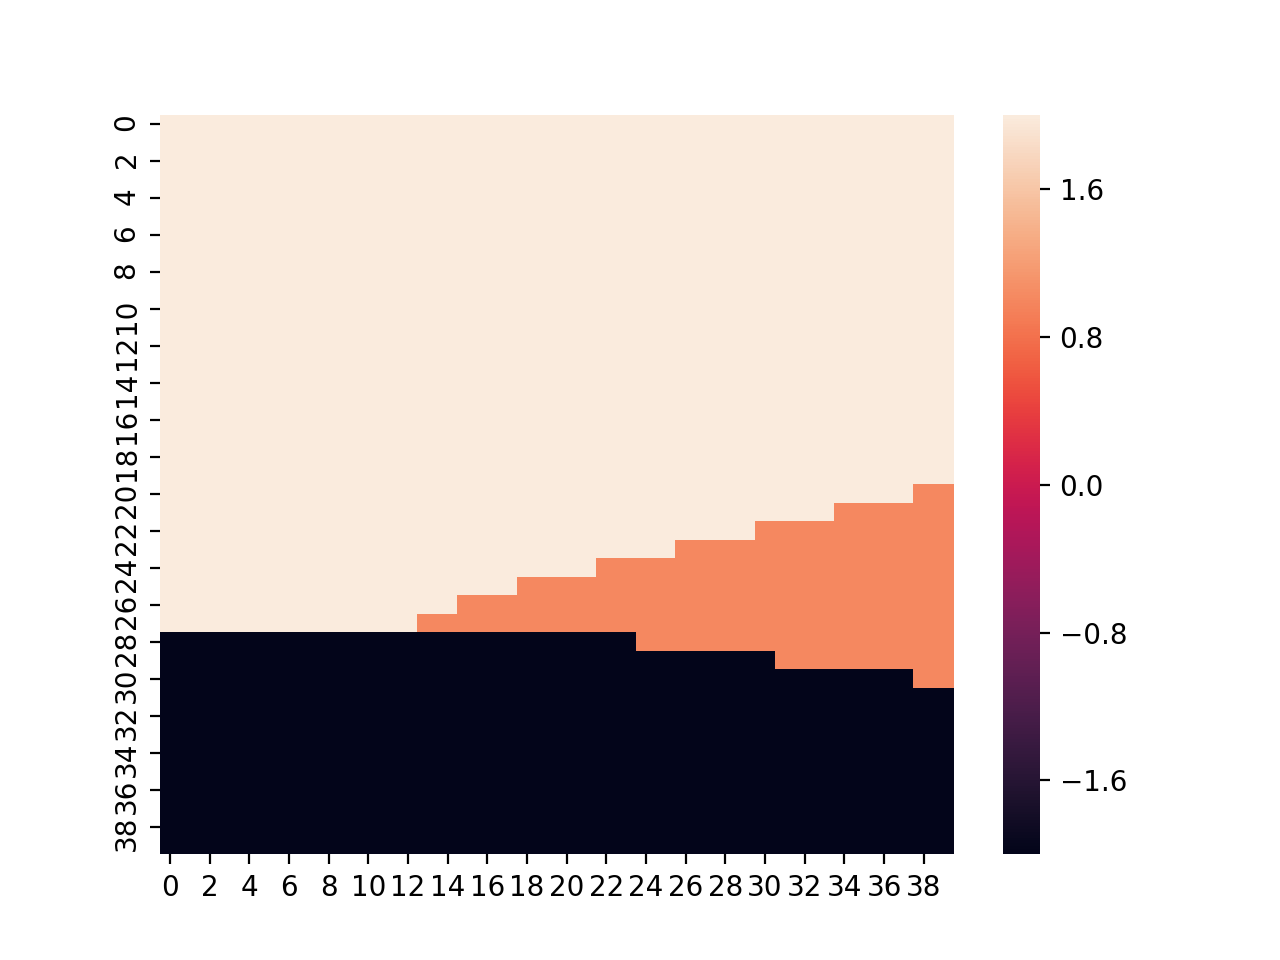

In [9]:
p = np.zeros(dp.index_nums) ###dp1policydraw
for i in dp.indexes:
    p[i] = sum(dp.policy[i]) #速度と角速度を足すと、1.0: 直進、2.0: 左回転、-2.0: 右回転になる

sns.heatmap(np.rot90(p[:, :, 18]), square=False) #180〜190[deg]の向きのときの行動を図示
plt.show()